# Conhecendo a base de dados

## Importando os dados


In [1]:
import pandas as pd
import numpy as np

In [3]:
url_data = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

In [4]:
df = pd.read_csv(url_data, sep=';')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 5.7 MB


In [5]:
df.sample(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
30964,Casa Comercial,Campo Grande,0,15,0,300,7000.0,NaN,NaN
5046,Loja/Salão,Barra da Tijuca,0,1,0,110,2800.0,1680.0,1100.0
31673,Apartamento,Copacabana,2,0,0,60,2400.0,700.0,NaN
20674,Apartamento,Lagoa,4,3,4,200,25000.0,3710.0,980.0
7159,Apartamento,Copacabana,2,0,0,67,2500.0,535.0,144.0
32682,Apartamento,Pechincha,2,1,1,75,1500.0,600.0,800.0
17531,Apartamento,Tijuca,2,0,0,80,1400.0,850.0,NaN
12841,Prédio Inteiro,Saúde,0,5,0,842,25000.0,NaN,300.0
7329,Apartamento,Penha,2,0,0,80,1100.0,265.0,NaN
14755,Loja Shopping/ Ct Comercial,Barra da Tijuca,0,0,0,175,7000.0,1600.0,250.0


In [ ]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [ ]:
df.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


## Características gerais da base de dados

In [ ]:
# Linhas e colunas
rows, columns = df.shape
print(f'{rows} linhas e {columns} colunas')

32960 linhas e 9 colunas


In [ ]:
# Lista com nomes das colunas
df.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 6.4 MB


In [ ]:
df['Tipo']

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Apartamento
...,...
32955,Quitinete
32956,Apartamento
32957,Apartamento
32958,Apartamento


In [9]:
df[['Condominio', 'IPTU']].isnull().sum()

Condominio     4093
IPTU          10237
dtype: int64

In [ ]:
df[['Quartos', 'Valor']]

,Quartos,Valor
0,1,1700.0
1,2,7000.0
2,0,5200.0
3,1,800.0
4,1,800.0
...,...,...
32955,0,800.0
32956,3,1800.0
32957,2,1400.0
32958,2,3000.0


# Análise exploratória de dados

## Qual o valor médio de aluguel por tipo de imóvel?

In [ ]:
# Agrupando pela coluna TIpo apenas as colunas numéricas e retornando suas médias
df.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [ ]:
# Agrupando as colunas tipo e valor, retornando a media de valor  cada tipo de imóvel. Como foi especificado a coluna numérica para média, não será necessário passar o parâmetro numecic_only.
df.groupby('Tipo')['Valor'].mean()

,Valor
Tipo,
Apartamento,4744.614648
Box/Garagem,1899.756098
Casa,6793.454922
Casa Comercial,14478.264151
Casa de Condomínio,11952.061245
Casa de Vila,1574.369478
Chácara,4900.000000
Conjunto Comercial/Sala,14715.045521
Flat,4546.189076


In [ ]:
# Ordenando a consulta anterior do menor apara o maior.
df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


<Axes: ylabel='Tipo'>

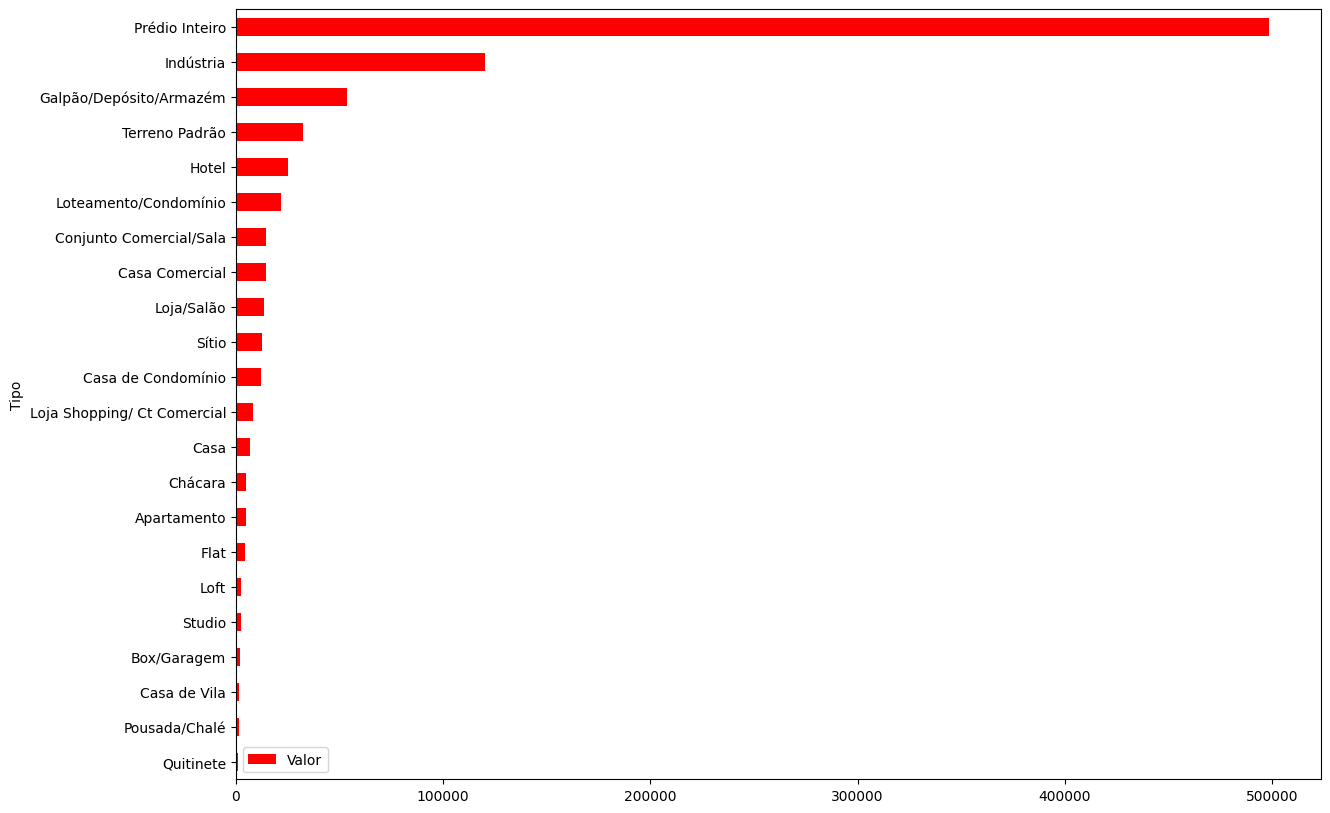

In [ ]:
# plotando gráfico
df_preco_tipo = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

df_preco_tipo.plot(kind='barh', figsize=(14,10), color='red')

In [ ]:
# tipo
df['Valor'].mean()

np.float64(12952.659715265761)

## Para saber mais: Entendendo groupBy

O método groupby do Pandas permite agrupar e resumir dados de um DataFrame, com base em um ou mais critérios. Esses critérios podem ser variáveis numéricas ou categóricas, como colunas ou índices do DataFrame.

A ideia por trás do **groupBy** é dividir os dado em grupos com base nos critério selecionados e, em seguida, aplicar uma operação a esses grupos. Essa operação pode ser uma função de agregação, como soma, média, contagem, desvio padrão, entre outras, ou mesmo uma operação personalizada definida pela pessoa usuária.

Esse método possui diversos parâmetros, alguns deles são:

* **by**: Mais comun, é usado para especificar a coluna ou colunas que queremos agrupar. Como argumento dele, podemos passar o nome de uma coluna ou uma lista de nomes de colunas;

* **axis**: Utilizamos esse parâmetro para especificar o eixo ao longo do qual queremos agrupar... O valor pardrão dele 0(zero), o que significa que as **linhas** serão agrupadas. Se quisermos agrupar as **colunas**, devemos defini-lo como 1;

* **sort**: Esse parâetro é um booleano **(True ou False)** que indica se os grupos devem ser ordenados pelo valor da coluna de agrupamento. O valor padrão é True;

* **dropna**:Utilizamos esse parâtro para controlar se os valores ausentes **(NaN)** serão excluídos ou não durante o processo de agrupamento. O valor padrão é True.

### Exemplo simples do uso do groupBy

In [ ]:
dados_exemplo = {
    'Animal': ['Cachorro', 'Gato', 'Elefante', 'Cachorro','Gato', 'Elefante'],
    'Cor': ['Preto', 'Branco', 'Cinza', 'Marrom', 'Preto', 'Marrom'],
    'Quantdade': [2,3,1,4,2,2]
}
exemplo_groupBy = pd.DataFrame(dados_exemplo)
exemplo_groupBy

,Animal,Cor,Quantdade
0,Cachorro,Preto,2
1,Gato,Branco,3
2,Elefante,Cinza,1
3,Cachorro,Marrom,4
4,Gato,Preto,2
5,Elefante,Marrom,2


In [ ]:
# Agrupando com groupBy

exemplo_groupBy.groupby('Animal').sum(numeric_only=True)

,Quantdade
Animal,
Cachorro,6
Elefante,3
Gato,5


In [ ]:
# agrupando e utilizando multiplas colunas
exemplo_groupBy.groupby(['Animal', 'Cor'])[['Quantdade']].sum()

Quantdade
Animal   Cor              
Cachorro Marrom          4
         Preto           2
Elefante Cinza           1
         Marrom          2
Gato     Branco          3
         Preto           2

In [ ]:
# lista com valores unicos
all_tipes = df.Tipo.unique()
imoveis_comerciais = []
all_tipes

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
# fiz assim = imoveis_comerciais.append(all_tipes[21])
imoveis_comerciais

[]

In [ ]:
#Usando querry com expressões
df.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [ ]:
# imoveis não comerciais
imoveis_nao_comerciais = df.query('@imoveis_comerciais not in Tipo')
imoveis_nao_comerciais

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


<Axes: ylabel='Tipo'>

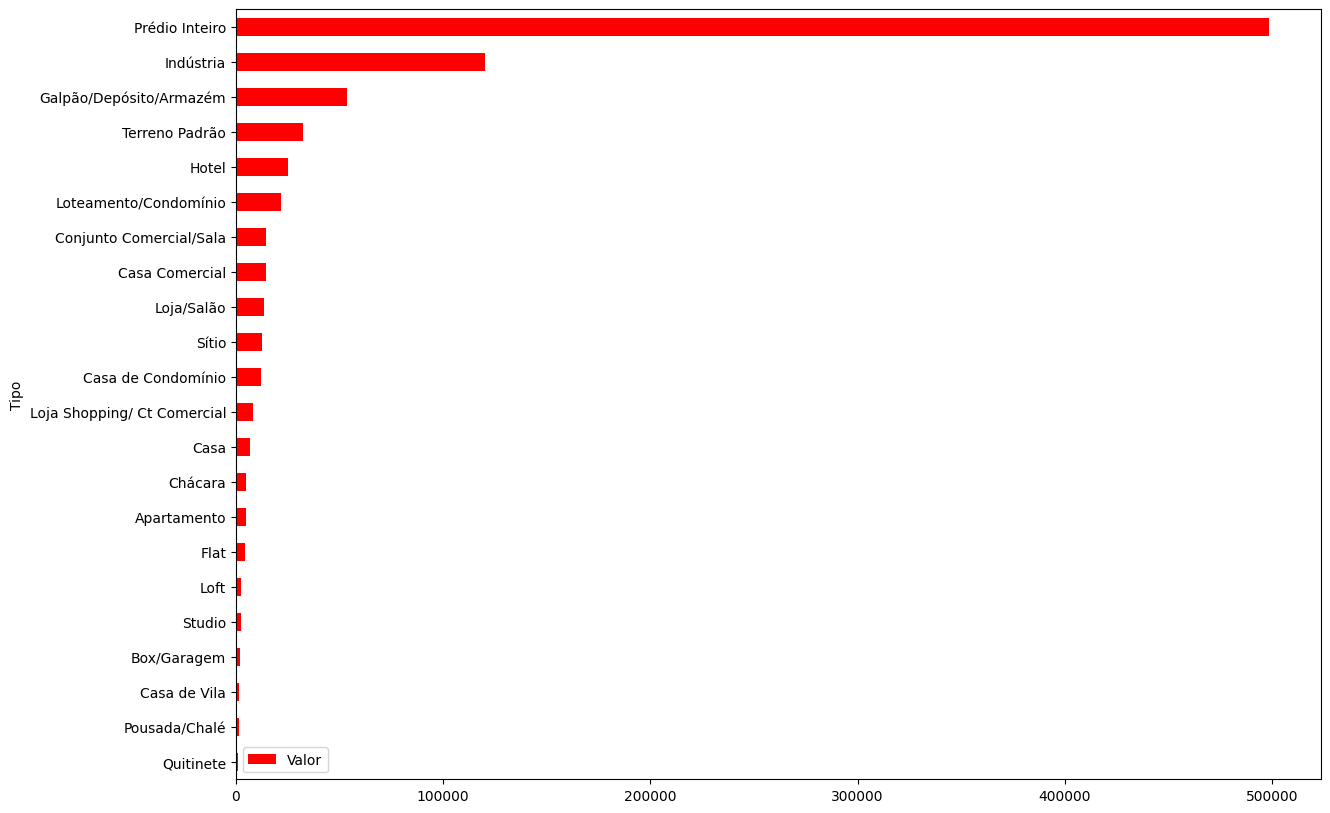

In [ ]:
preco_tipo = imoveis_nao_comerciais.groupby('Tipo')[['Valor']].mean().sort_values('Valor')
preco_tipo.plot(kind='barh', figsize=(14,10), color='red')

### Realizando seleções com query

O método query é uma ferramenta do Pandas que permite selecionar dados em um DataFrame usando as condições que especificamos. Eel usa uma sintaxe semelhante ao SQL e é útil quando precisamos filtrar nossos dados.



In [ ]:
imoveis_nao_comerciais[imoveis_nao_comerciais['Suites'] >= 1]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
15,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0
...,...,...,...,...,...,...,...,...,...
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
32947,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
32949,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0
32952,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0


## Qual o percentual de cada tipo de imóvel na nossa base de dados?

In [ ]:
imoveis_nao_comerciais.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
imoveis_nao_comerciais.Tipo.value_counts(normalize=True)

,proportion
Tipo,
Apartamento,0.592597
Conjunto Comercial/Sala,0.206766
Loja/Salão,0.043265
Casa de Condomínio,0.030218
Casa,0.029339
Quitinete,0.025364
Galpão/Depósito/Armazém,0.018902
Flat,0.014442
Prédio Inteiro,0.009132


<Axes: xlabel='Tipos', ylabel='Percentual'>

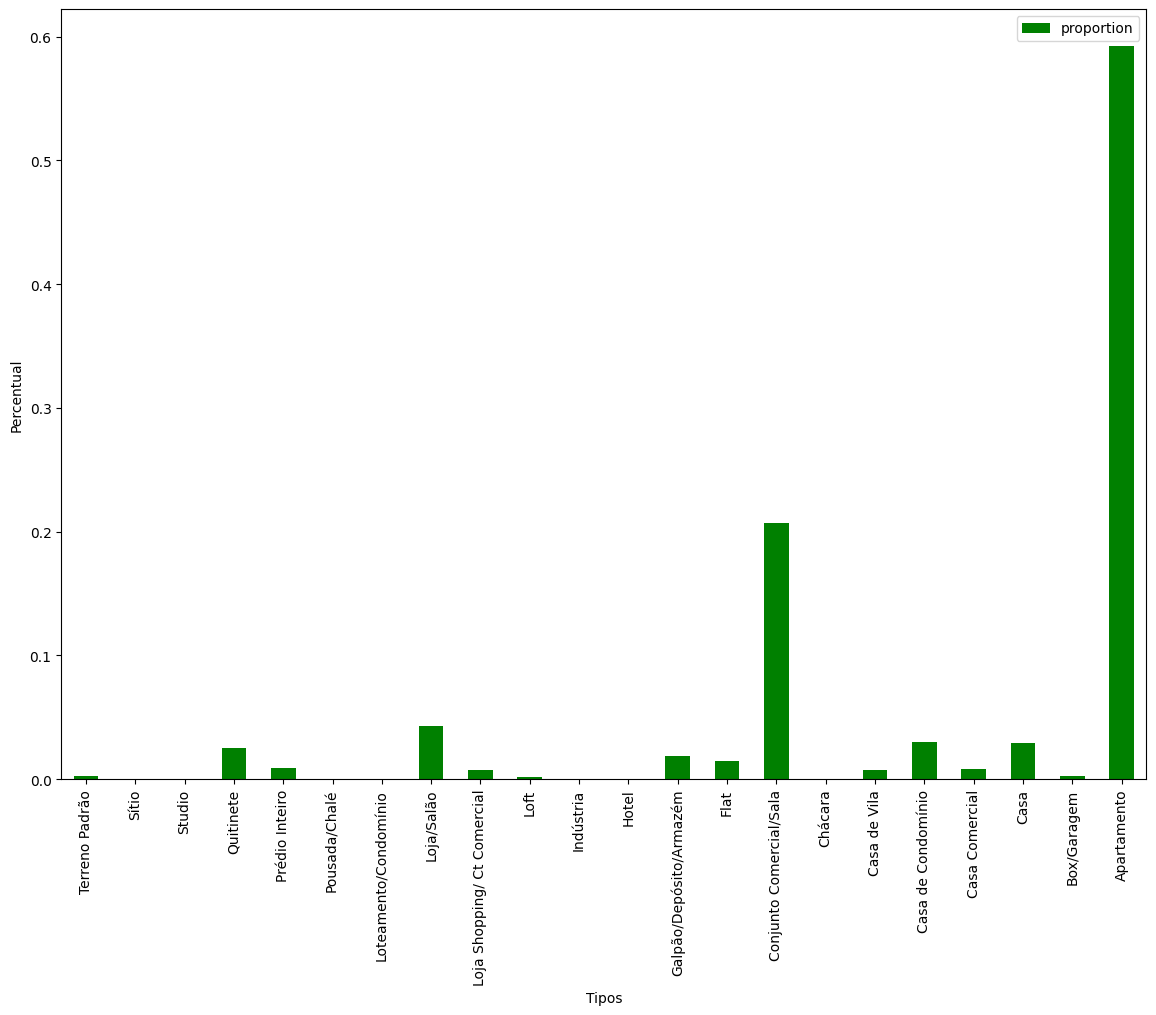

In [ ]:
imoveis_nao_comercial_percentual = imoveis_nao_comerciais.Tipo.value_counts(normalize=True).to_frame().sort_values('Tipo', ascending=False)
imoveis_nao_comercial_percentual.plot(kind='bar', figsize=(14,10), color='green', xlabel='Tipos', ylabel='Percentual')

### **Selecionando apenas os imóveis do tipo apartamento**

In [ ]:
df_apartamentos = imoveis_nao_comerciais.query('Tipo == "Apartamento"')
df_apartamentos.sample(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
24813,Apartamento,Recreio dos Bandeirantes,2,2,1,100,1600.0,1171.0,195.0
13040,Apartamento,Engenho Novo,1,0,1,40,500.0,456.0,36.0
11266,Apartamento,Ipanema,3,1,1,140,6800.0,2086.0,324.0
3916,Apartamento,Barra da Tijuca,2,1,1,83,2000.0,1335.0,NaN
27154,Apartamento,Copacabana,2,0,1,67,2800.0,700.0,95.0
3321,Apartamento,Pechincha,3,1,1,76,1450.0,652.0,742.0
16888,Apartamento,Recreio dos Bandeirantes,2,1,1,90,1800.0,850.0,180.0
25194,Apartamento,Praça Seca,2,0,0,43,700.0,190.0,13.0
27586,Apartamento,Tijuca,2,2,1,185,3000.0,1548.0,224.0
17297,Apartamento,Jardim América,2,0,0,70,750.0,NaN,NaN


# Para saber mais: Alterando os nomes de colunas

Quando trabalhamos com bases de dados, em alguns momentos, pode ser necessário alterar nomes das colunas.


# Tratando e filtrando os dados

## Tratando nulos
Tratar dados nulos em uma base de dados é muito importante porque esses dados faltantes podem interferir diretamente na qualidade das análises e nos resultados obtidos. Quando existem dados nulos em um conjunto de dados, podem ocorrer problemas como viés, redução da acurácia e imprecisão nas informações obtidas.

Além disso, algumas análises e modelos estatísticos não são capazes de lidar com a presença de dados faltantes. Por isso, o tratamento dos dados nulos é fundamental para garantir a confiabilidade e a precisão das análises e decisões tomadas a partir desses dados.

Existem diversas formas de tratar dados nulos com o **Pandas**. Algumas das principais formas são:

* **Remover os dados nulos**: É possível remover as linhas ou colunas que possuem valores nulos utilizando o método `dropna()` . Esse método remove todas as linhas ou colunas que possuem pelo menos um valor nulo.

* **Preencher os dados nulos**: Utilizando o método **`fillna()`**, podemos preencher os valores nulos com um valor específico. Além disso, também é possível utilizar argumentos específicos do método **`fillna()`** como o `method=”ffill”` ou `method=”bfill`” para preencher os valores nulos com o valor anterior ou posterior, respectivamente.

* **Interpolar os dados nulos**: É possível utilizar o método `interpolate()` para preencher os valores nulos com valores interpolados, ou seja, valores calculados a partir dos valores vizinhos.

É importante escolher a melhor forma de tratar os dados nulos de acordo com a situação específica e o objetivo da análise de dados.



## Lidando com dados nulos

In [ ]:
# nulos por coluna
df_apartamentos.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,7
Condominio,745
IPTU,5472


In [ ]:
# substituindo nulos por zero

df_apartamentos.fillna(0, inplace=True)
df_apartamentos

<ipython-input-31-b1d75ba65f11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamentos.fillna(0, inplace=True)


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
# apos fillna
df_apartamentos.isnull().sum()

,0
Tipo,0
Bairro,0
Quartos,0
Vagas,0
Suites,0
Area,0
Valor,0
Condominio,0
IPTU,0


## Removendo registros

## método drop
O método drop() da biblioteca Pandas permite remover uma ou mais linhas e/ou colunas de um DataFrame. Essa remoção pode ser realizada de forma permanente no DataFrame original. É possível especificar os índices das linhas e/ou colunas a serem removidos, bem como o eixo em que a remoção deve ocorrer.



In [ ]:
df_apartamentos.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
76,Apartamento,Barra da Tijuca,2,1,1,70,0.0,970.0,68.0
113,Apartamento,Praça Seca,2,0,0,80,1000.0,0.0,0.0
166,Apartamento,Rocha Miranda,2,1,0,50,1100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32609,Apartamento,Copacabana,3,0,0,130,4600.0,0.0,0.0
32643,Apartamento,Guadalupe,1,0,0,40,550.0,0.0,0.0
32666,Apartamento,Bonsucesso,1,0,0,60,1000.0,0.0,0.0
32708,Apartamento,Flamengo,2,0,0,59,3500.0,0.0,0.0


In [ ]:
# pegando indices para saber ondes esses dados estao localizados
df_apartamentos.query('Valor == 0 | Condominio == 0').index

Index([    5,    10,    76,   113,   166,   194,   258,   265,   275,   292,
       ...
       32420, 32438, 32480, 32538, 32584, 32609, 32643, 32666, 32708, 32809],
      dtype='int64', length=752)

In [ ]:
registers_to_remove = df_apartamentos.query('Valor == 0 | Condominio == 0').index

In [ ]:
# Usando metodo drop - axis 0 == linhas, 1 == colunas, inplace == efetiva o comando
df_apartamentos.drop(registers_to_remove, axis=0, inplace=True)

<ipython-input-36-a7e044972971>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamentos.drop(registers_to_remove, axis=0, inplace=True)


In [ ]:
# checando se o comando foi realizado com sucesso
df_apartamentos.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [ ]:
df_apartamentos.sample(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
19409,Apartamento,Tijuca,1,0,1,32,1750.0,320.0,0.0
20921,Apartamento,Andaraí,2,1,1,73,1500.0,745.0,83.0
32134,Apartamento,Freguesia (Jacarepaguá),2,0,0,40,1000.0,150.0,0.0
13993,Apartamento,Flamengo,2,0,1,65,2500.0,700.0,35.0
6308,Apartamento,Engenho de Dentro,3,1,0,63,980.0,650.0,0.0
19410,Apartamento,Copacabana,3,0,0,85,3000.0,1083.0,215.0
1692,Apartamento,Leblon,4,3,3,509,25000.0,4819.0,2341.0
9947,Apartamento,Recreio dos Bandeirantes,3,2,3,91,2500.0,780.0,180.0
1902,Apartamento,Leblon,3,1,1,130,7500.0,1900.0,654.0
26012,Apartamento,Ipanema,3,2,1,160,8000.0,2200.0,0.0


In [ ]:
# Excluindo a coluna Tipo, ja que ela apresenta apenas um valor
df_apartamentos.Tipo.unique()

array(['Apartamento'], dtype=object)

In [ ]:
df_apartamentos.drop('Tipo', axis=1, inplace=True)
df_apartamentos

<ipython-input-40-80e1c765307a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apartamentos.drop('Tipo', axis=1, inplace=True)


,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
32951,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
32953,Méier,2,0,0,70,900.0,490.0,48.0
32956,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Filtros

### **1. Apartamentos que possuem `1 quarto` e `aluguel menor que 1200`**



In [ ]:
df_um_quarto_menor_1200 = df_apartamentos[(df_apartamentos['Quartos'] == 1) & (df_apartamentos['Valor'] < 1200)]
df_um_quarto_menor_1200

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
4,Higienópolis,1,0,0,48,800.0,230.0,0.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
...,...,...,...,...,...,...,...,...
32596,Grajaú,1,0,1,37,1000.0,200.0,0.0
32617,Pechincha,1,0,1,69,900.0,640.0,126.0
32627,Glória,1,0,0,46,1100.0,453.0,32.0
32714,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [ ]:
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


### **2. `Apartamentos` que possuem pelo menos `2 quartos`, `aluguel menor que 3000` e `area maior que 70`**

In [ ]:
df_2Quartos_menor_3k_a70 = df_apartamentos[(df_apartamentos['Quartos']==2) & (df_apartamentos['Valor'] < 3000) & (df_apartamentos['Area'] > 70)]
df_2Quartos_menor_3k_a70

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
21,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Tijuca,2,1,0,78,2000.0,700.0,0.0
32,Botafogo,2,1,0,76,2500.0,740.0,0.0
57,Recreio dos Bandeirantes,2,1,2,83,1600.0,1160.0,157.0
67,Maracanã,2,0,0,86,1800.0,600.0,82.0
...,...,...,...,...,...,...,...,...
32881,Taquara,2,1,1,71,1300.0,470.0,0.0
32890,Freguesia (Jacarepaguá),2,1,1,87,1300.0,869.0,77.0
32933,Recreio dos Bandeirantes,2,1,1,105,2100.0,648.0,156.0
32934,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0


## Salvando os dados

In [ ]:
# salvando em csv
df_apartamentos.to_csv('dados_apartamentos.csv', index=False, sep=';')

In [ ]:
pd.read_csv('dados_apartamentos.csv', sep=';')

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Higienópolis,1,0,0,48,800.0,230.0,0.0
2,Cachambi,2,0,0,50,1300.0,301.0,17.0
3,Grajaú,2,1,0,70,1500.0,642.0,74.0
4,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...
18775,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0
18776,Méier,2,0,0,70,900.0,490.0,48.0
18777,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
18778,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
df_um_quarto_menor_1200.to_csv('dados_01quartos_menor1200.csv', index=False)

In [ ]:
df_2Quartos_menor_3k_a70.to_csv('dados_02quartos_3k_a70.csv', index=False)

# Manipulando os dados

## Criando colunas numéricas

In [ ]:
dados = pd.read_csv(url_data, sep= ';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


### Criando uma nova coluna

In [ ]:
# Somar os valores das colunas valor + condominio

dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0


In [ ]:
# Valor por ano

dados['Valor_por_ano'] = dados['Valor_por_mes'] * 12 + dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN


## Criando colunas categóricas

In [ ]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + dados['Quartos'].astype(str) + ' quarto(s) e ' + dados['Vagas'].astype(str) + ' vagas de garagem.'
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...


In [ ]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...


In [ ]:
# Coluna binaria

dados['Possui_Suite'] = dados['Suites'].apply(lambda x: 'sim' if x > 0 else 'nao')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Valor_por_ano,Descricao,Possui_Suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 va...,nao
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN,NaN,NaN,Casa em Jardim Botânico com 2 quarto(s) e 0 va...,sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca com...,nao
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vaga...,nao
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN,1030.0,NaN,Apartamento em Higienópolis com 1 quarto(s) e ...,nao


## Extras Desafios
alunos.csv

In [ ]:
#1) Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.
url_alunos = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'

In [ ]:
df_alunos = pd.read_csv(url_alunos)
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


In [ ]:
# 2) Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.
df_alunos.head(7)

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True


In [ ]:
df_alunos.tail()

,Nome,Idade,Notas,Aprovado
13,Mirla,25,9.0,True
14,Paulo,37,NaN,False
15,Mylena,29,7.0,True
16,Lucas,33,NaN,False
17,Nadia,34,8.0,True


In [ ]:
# 3) Confira a quantidade de linhas e colunas desse DataFrame.
alunos_rows, alunos_columns = df_alunos.shape
print(f'{alunos_rows} linhas e {alunos_columns} colunas')

18 linhas e 4 colunas


In [ ]:
#4) Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.
df_alunos.describe()

,Idade,Notas
count,18.000000,12.000000
mean,25.500000,6.800000
std,6.070662,2.204953
min,18.000000,2.500000
25%,21.000000,5.450000
50%,24.500000,7.000000
75%,28.750000,8.250000
max,37.000000,10.000000


In [ ]:
# alunos aprovados
alunos_aprovados = df_alunos[df_alunos['Aprovado'] == True]
alunos_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [ ]:
# alunos Reprovados
alunos_reprovados = df_alunos[(df_alunos['Aprovado'] != True) & (~df_alunos['Notas'].isna())]
alunos_reprovados

,Nome,Idade,Notas,Aprovado
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
8,Alice,35,5.6,False
11,Igor,24,4.5,False


In [ ]:
# Alunos sem nota
df_alunos[df_alunos['Notas'].isna()]

,Nome,Idade,Notas,Aprovado
1,Ana,18,NaN,False
5,Bruna,23,NaN,False
9,Vitor,28,NaN,False
10,Daniel,21,NaN,False
14,Paulo,37,NaN,False
16,Lucas,33,NaN,False


In [ ]:
dados = {
    'Nome': ['Jetta', 'Passat', 'Crossfox', 'DS5', 'Fusca'],
    'Motor': ['Motor 4.0 Turbo', 'Motor Diesel', 'Motor Diesel V8', 'Motor 2.0', 'Motor 1.6'],
    'Ano': [2019, 2003, 1991, 2019, 1990],
    'Quilometragem': [0.0, 5712.0, 37123.0, 0.0, 120000.0],
    'Valor': [88000.0, 106000.0, 72000.0, 89000.0, 32000.0],
    'IPVA': [2000.0, 5000.0, 1700.0, 2200.0, 1000.0],
    'Desconto': [380.0, 450.0, 277.0, 400.0, 150.0]
}

carros = pd.DataFrame(dados)
carros

,Nome,Motor,Ano,Quilometragem,Valor,IPVA,Desconto
0,Jetta,Motor 4.0 Turbo,2019,0.0,88000.0,2000.0,380.0
1,Passat,Motor Diesel,2003,5712.0,106000.0,5000.0,450.0
2,Crossfox,Motor Diesel V8,1991,37123.0,72000.0,1700.0,277.0
3,DS5,Motor 2.0,2019,0.0,89000.0,2200.0,400.0
4,Fusca,Motor 1.6,1990,120000.0,32000.0,1000.0,150.0


In [ ]:
carros['Total'] = (carros['IPVA'] + carros['Valor']) - carros['Desconto']
carros

,Nome,Motor,Ano,Quilometragem,Valor,IPVA,Desconto,Total
0,Jetta,Motor 4.0 Turbo,2019,0.0,88000.0,2000.0,380.0,89620.0
1,Passat,Motor Diesel,2003,5712.0,106000.0,5000.0,450.0,110550.0
2,Crossfox,Motor Diesel V8,1991,37123.0,72000.0,1700.0,277.0,73423.0
3,DS5,Motor 2.0,2019,0.0,89000.0,2200.0,400.0,90800.0
4,Fusca,Motor 1.6,1990,120000.0,32000.0,1000.0,150.0,32850.0
